In [1]:
# Dos funciones que devuelven el mismo resultado
# Pero tienen distinto rendimiento
# uno es constante, el otro es lineal

In [2]:
import time
import tqdm
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
def calcula_suma_lineal(cantidad):
    ''' calcula la suma de n numeros, pero sumando de uno en uno '''
    suma = 0
    for i in range(1, cantidad + 1):
        # Vamos a detener un segundo por cada iteracion
        time.sleep(1)
        suma += i
    return suma

In [5]:
def calcula_suma_constante(cantidad):
    ''' calcula la suma de n numeros, pero de manera optima '''
    # Vamos a detener un segundo por cada iteracion
    time.sleep(1)
    return cantidad * (cantidad + 1) / 2

In [6]:
inicio = time.time()
print('Suma constante')
print(calcula_suma_constante(5))
print('tiempo: ', time.time() - inicio)

inicio = time.time()
print('Suma lineal')
print(calcula_suma_lineal(5))
print('tiempo: ', time.time() - inicio)

Suma constante
15.0
tiempo:  1.0141260623931885
Suma lineal
15
tiempo:  5.042082071304321


In [7]:
# Probando para mas casos

def calcula_tiempos(cantidad):
    inicio_lineal = time.time()
    suma_lineal = calcula_suma_lineal(cantidad=cantidad)
    fin_lineal = time.time()
    duracion_lineal = fin_lineal - inicio_lineal

    inicio_constante = time.time()
    suma_constante = calcula_suma_constante(cantidad=cantidad)
    fin_constante = time.time()
    duracion_constante = fin_constante - inicio_constante
    return {'lineal': duracion_lineal, 'constante': duracion_constante}

In [8]:
lista_tiempos = []

for i in tqdm.tqdm(range(5)):
    tiempos = calcula_tiempos(cantidad=2**i)
    lista_tiempos.append({
        'cantidad': 2**i,
        'tiempo_lineal': tiempos['lineal'],
        'tiempo_constante': tiempos['constante'],
    })

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  8.60s/it]


<AxesSubplot:xlabel='cantidad'>

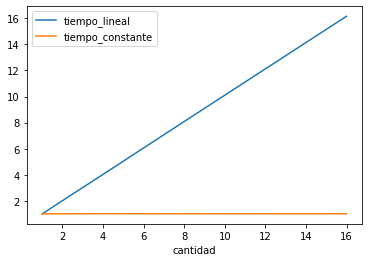

In [9]:
pd.DataFrame(lista_tiempos).set_index('cantidad').plot()